# Employee Attrition Risk Prediction

---

A stable workforce is vital for organisation's success, leading to increased productivity, cost effectiveness and retention of institutional knowledge. This project aims to identify factors that influence employee attrition, predict attrition risk level and propose intervention strategies. Cox Proportional Hazard regression model (CoxPH) and Random Survival Forest (RSF) will be used to assess company's turnover events.

### Data Source

Our dataset is sourced from [IBM HR analytics synthetic data](https://github.com/IBM/employee-attrition-aif360/), made available under [Open Database License](https://opendatacommons.org/licenses/odbl/1.0/) and [Database Content License](https://opendatacommons.org/licenses/dbcl/1.0/).

### Analysis Tool

We will be using R for our data analysis.


## Importing Data

We set aside some verificational data to measure our performance.

In [1]:
# Importing data
rm(list = ls())
DATA <- read.csv("hr_data.csv")

# Save some for verification
set.seed(123)
SIZE <- round(0.1*nrow(DATA))
RAND <- sample(1:nrow(DATA))
VERI <- DATA[RAND[1:round(0.1*nrow(DATA))], ]
hr <- DATA[-RAND[1:round(0.1*nrow(DATA))], ]

set.seed(NULL)

---

## Performing Data Wrangling

Firstly, we skim the data and check for duplicates, empty values, data types and ranges.

In [2]:
# First few rows
hr
# Number of duplicated rows
nrow(hr[duplicated(hr), ])
# Number of empty values
sum(is.na(hr))
# All column's ranges and types
summary(hr)
sapply(hr, function(x) {
  unique_vals <- sort(unique(x))
  if (length(unique_vals) <= 30) return(unique_vals)
  return(c(unique_vals[1:30], "etc"))
})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6
7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,⋯,1,80,3,12,3,2,1,0,0,0
8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,⋯,2,80,1,1,2,3,1,0,0,0
9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,⋯,2,80,0,10,2,3,9,7,1,8


[1] 0

[1] 0

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1323        Length:1323        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 467.5  
 Median :36.00   Mode  :character   Mode  :character   Median : 798.0  
 Mean   :36.78                                         Mean   : 800.5  
 3rd Qu.:42.00                                         3rd Qu.:1155.5  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1323        Min.   : 1.000   Min.   :1.000   Length:1323       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.161   Mean   :2.902                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

$Age
 [1] "18"  "19"  "20"  "21"  "22"  "23"  "24"  "25"  "26"  "27"  "28"  "29" 
[13] "30"  "31"  "32"  "33"  "34"  "35"  "36"  "37"  "38"  "39"  "40"  "41" 
[25] "42"  "43"  "44"  "45"  "46"  "47"  "etc"

$Attrition
[1] "No"  "Yes"

$BusinessTravel
[1] "Non-Travel"        "Travel_Frequently" "Travel_Rarely"    

$DailyRate
 [1] "102" "103" "104" "105" "106" "107" "109" "111" "115" "116" "117" "118"
[13] "119" "120" "121" "124" "125" "128" "129" "130" "131" "132" "134" "135"
[25] "136" "138" "140" "141" "142" "143" "etc"

$Department
[1] "Human Resources"        "Research & Development" "Sales"                 

$DistanceFromHome
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29

$Education
[1] 1 2 3 4 5

$EducationField
[1] "Human Resources"  "Life Sciences"    "Marketing"        "Medical"         
[5] "Other"            "Technical Degree"

$EmployeeCount
[1] 1

$EmployeeNumber
 [1] "1"   "2"   "4"   "5"   "7"   "8"   "10"  "11"  "12"  "13"  "14"  "15" 
[13] "18"  "19"  "20"  "21"  "22"  "23"  "24"  "26"  "27"  "28"  "30"  "31" 
[25] "33"  "35"  "36"  "38"  "39"  "40"  "etc"

$EnvironmentSatisfaction
[1] 1 2 3 4

$Gender
[1] "Female" "Male"  

$HourlyRate
 [1] "30"  "31"  "32"  "33"  "34"  "35"  "36"  "37"  "38"  "39"  "40"  "41" 
[13] "42"  "43"  "44"  "45"  "46"  "47"  "48"  "49"  "50"  "51"  "52"  "53" 
[25] "54"  "55"  "56"  "57"  "58"  "59"  "etc"

$JobInvolvement
[1] 1 2 3 4

$JobLevel
[1] 1 2 3 4 5

$JobRole
[1] "Healthcare Representative" "Human Resources"          
[3] "Laboratory Technician"     "Manager"                  
[5] "Manufacturing Director"    "Research Director"        
[7] "Research Scientist"        "Sales Executive"          
[9] "Sales Representative"     

$JobSatisfaction
[1] 1 2 3 4

$MaritalStatus
[1] "Divorced" "Married"  "Single"  

$MonthlyIncome
 [1] "1009" "1051" "1052" "1081" "1091" "1102" "1118" "1129" "1200" "1223"
[11] "1232" "1274" "1359" "1393" "1416" "1420" "1483" "1514" "1555" "1563"
[21] "1569" "1601" "1611" "1675" "1702" "1706" "1790" "1859" "1878" "1904"
[31] "etc" 

$MonthlyRate
 [1] "2094" "2097" "2112" "2122" "2125" "2227" "2243" "2261" "2288" "2302"
[11] "2326" "2338" "2354" "2373" "2396" "2437" "2447" "2493" "2539" "2560"
[21] "2561" "2613" "2689" "2690" "2706" "2721" "2725" "2739" "2755" "2819"
[31] "etc" 

$NumCompaniesWorked
 [1] 0 1 2 3 4 5 6 7 8 9

$Over18
[1] "Y"

$OverTime
[1] "No"  "Yes"

$PercentSalaryHike
 [1] 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

$PerformanceRating
[1] 3 4

$RelationshipSatisfaction
[1] 1 2 3 4

$StandardHours
[1] 80

$StockOptionLevel
[1] 0 1 2 3

$TotalWorkingYears
 [1] "0"   "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11" 
[13] "12"  "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23" 
[25] "24"  "25"  "26"  "27"  "28"  "29"  "etc"

$TrainingTimesLastYear
[1] 0 1 2 3 4 5 6

$WorkLifeBalance
[1] 1 2 3 4

$YearsAtCompany
 [1] "0"   "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11" 
[13] "12"  "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23" 
[25] "24"  "25"  "26"  "27"  "29"  "30"  "etc"

$YearsInCurrentRole
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18

$YearsSinceLastPromotion
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

$YearsWithCurrManager
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

There are issues that we can solve by transforming our data:

1. Some unnecessary variables for analysis, such as the one reflecting unique identification (that is, `EmployeeNumber`) and the single-valued ones (such as `EmployeeCount`).

2. All string variables are categorical, with some variables specifically Boolean.

We will filter `EmployeeNumber` and single-valued variables via column name list to retain original dataset, then adjust the format of categorical variables. For clarity, we convert binary "Yes/No" variables to Boolean type. We treat the rating/level variables as pseudo-continuous to ease our analysis.

A separate exploration conducted by Project Creator indicates possible cross-column consistency issues, particularly from time period columns (`Age`, `TotalWorkingYears`, `Years...`) and income columns (`DailyRate`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`). These may have been accidentally introduced during the creation process of our synthetic data, and with the lack of complete data column descriptions, we are skipping cleaning this aspect for now. We are also making a mental note that time period columns such as `YearsAtCompany` may have a zero value, perhaps from a round-down of "six months or less".

### Performing Additional Cleaning

In [3]:
# Filter irrelevant columns
cols <- names(hr)
cols <- cols[cols != "EmployeeNumber"]
single_value_cols <- names(hr)[sapply(hr, function (col) length(unique(col)) == 1)]
cols <- cols[!(cols %in% single_value_cols)]

# Convert column data types
cat_cols <- c("BusinessTravel", "Department", "Gender", "EducationField", "JobRole", "MaritalStatus")
hr[cat_cols] <- lapply(hr[cat_cols], factor)
bool_cols <- c("Attrition", "Over18", "OverTime")
hr[bool_cols] <- lapply(hr[bool_cols], function (col) ifelse(col %in% c("Yes", "Y"), TRUE, FALSE))
                        
head(hr[cols])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<lgl>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,TRUE,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
2,49,FALSE,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,⋯,4,4,1,10,3,3,10,7,1,7
3,37,TRUE,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,⋯,3,2,0,7,3,3,0,0,0,0
4,33,FALSE,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,⋯,3,3,0,8,3,3,8,7,3,0
5,27,FALSE,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,⋯,3,4,1,6,3,3,2,2,2,2
6,32,FALSE,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,⋯,3,3,0,8,2,2,7,7,3,6


### Outliers

At the very basic, we need to find the outliers of our target variable (in this case, `YearsAtCompany`) in order for our model to generalise well.

In [4]:
outlier_index <- function(df, col) {
    vec <- df[[col]]
    qnt <- quantile(vec, probs = c(0.25, 0.75))
    iqr <- qnt[2] - qnt[1]
    min <- qnt[1] - 3 * iqr
    max <- qnt[2] + 3 * iqr
    return(which(vec < min | vec > max))
}

hr_full_row <- hr
hr <- hr_full_row[-outlier_index(hr_full_row, "YearsAtCompany"), ]

---

## Developing Survival Model

We utilise Cox Proportional Hazard and Random Survival Forest models, available from R's library `Survival` and `randomForestSRC`. These models offer distinct approaches: CoxPH model is commonly used in statistical analysis due to its interpretability and generalisation, allowing researchers to assess the contribution of variables and generate event's theoretical framework. Meanwhile, RSF is a powerful machine learning algorithm with embedded feature selection capabilities such as variable importance, which is able to incorporate non-linear relationships.

A [comparative research on high-dimensional data](https://www.nature.com/articles/s41598-020-77220-w) indicates that CoxPH with univariate concordance index's (C-index) feature selection and RSF with variable importance's feature selection perform quite well on empirical data. Currently, we are pairing both models with aforementioned feature selection methods, although wrapper methods may yield a better result.

We set `YearsAtCompany` as the survival time variable and `Attrition` as status variable. We use concordance index (C-index) and Prediction Error Curve (PEC, i.e. integrated Brier score) to measure models' accuracy.

Below is the code for various functions used in our modelling:

In [5]:
library(survival)
suppressMessages(library(randomForestSRC))
suppressMessages(library(pec))
library(reshape2)
library(ggplot2)
suppressMessages(library(viridis))

# === Models
coxph_model <- function (df) {
  model <- coxph(data = df, formula = Surv(YearsAtCompany, Attrition) ~ ., method = "breslow", x = TRUE)
  return(model)
}
rsf_model <- function (df) {
  model <- rfsrc(Surv(YearsAtCompany, Attrition) ~ ., data = df, ntree = 100)
  return(model)
}

# === Cross-validation function
cross_val <- function (df, model_f, metrics_f, k = 5) {
  random_index <- sample(1:nrow(df))
  for (fold in 1:k) {
    prev_end <- round((fold-1)/k * nrow(df))
    size <- round(fold * nrow(df)/k) - round((fold-1) * nrow(df)/k)
    idx <- random_index[(prev_end+1):(prev_end+size)]
    test <- df[idx, ]
    train <- df[-idx, ]
    model <- model_f(train)
    metrics <- metrics_f(test, model)
    if (!exists("metrics_tot")) {
      metrics_tot <- numeric(length(metrics)) # Also caters for "non-vector, numeric" metrics
    }
    metrics_tot <- metrics_tot + metrics
  }
  metrics_avg <- metrics_tot/k
  return(metrics_avg[order(abs(metrics_avg), decreasing = TRUE)])
}

# === Accuracy metrics
# 1. Feature rank
# - Cox score
coxph_score <- function (df, model) { # C-index happenst to overlap with Cox score
  return(c_index(df, model))
}
coxph_significance <- function (df, model) {
  return(summary(model)$coefficients[, "Pr(>|z|)"])
}
coxph_slope <- function (df, model) {
  return(summary(model)$coefficients[, "coef"])
}
print_coxph_var_rank <- function (df) {
  features <- names(df)[!(names(df) %in% c("Attrition", "YearsAtCompany"))]
  scores <- sapply(features, function (col){
    cross_val(df[c("Attrition", "YearsAtCompany", col)], coxph_model, coxph_score)
  })
  names(scores) <- features
  print("Average univariate Cox score:")
  print(scores[order(scores, decreasing = TRUE)])
}
# - Importance
rsf_importance <- function (df, model) {
  return(predict(model, df, importance = TRUE)$importance)
}
print_rsf_var_rank <- function (df) {
  print("Average variable importance:")
  print(cross_val(df, rsf_model, rsf_importance))
}

# 2. C-index
c_index <- function (df, model) {
  c_table <- cindex(model, formula = Surv(YearsAtCompany, Attrition) ~ ., data = df)
  if (unlist(c_table$Pairs) == 0) return(0) # In case of zero events
  return(unlist(c_table$AppCindex))
}
print_c_index <- function(df, model_f) {
  print("Average concordance index:")
  print(cross_val(df, model_f, c_index))
}

# 3. PEC
plot_pec <- function(df, model_f) {
  suppressMessages(pred_error <- pec(model_f(df), data = df, formula = Surv(YearsAtCompany, Attrition) ~ .,
                    splitMethod = "cv10", cens.model = "marginal", reference = FALSE))
  plot(pred_error, xlim = c(0, 10), ylim = c(0, 0.25)) # 0.25 is the worst case scenario (random model)
  title("Prediction Error Curve")
}


# === Assumption functions
check_proportional_hazard <- function(model) {
  print(cox.zph(model))
}
plot_correlation <- function (df, limit = -1) {
  # Only numerical (unless categories can be continuously extended)
  num_cols <- sapply(df, is.numeric)
  bool_cols <- sapply(df, is.logical)
  df2 <- df[, num_cols | bool_cols]

  # Only select the high-correlated columns
  cor_matrix <- cor(df2)
  high_cor_pairs <- which(cor_matrix >= limit & cor_matrix < 1, arr.ind = TRUE)
  high_cor_cols <- colnames(df2)[high_cor_pairs[, 1]]
  ggplot(data = melt(cor_matrix[high_cor_cols, high_cor_cols]), aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() + scale_fill_viridis() +
    xlab("") + ylab("") + ggtitle("Correlation Map") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
         plot.title = element_text(hjust = 0.5))
}

### First thing first: Another cleaning

The time-dependent variables such as `Age`, `TotalWorkingYears`, `YearsInCurrentRole`, `YearsWithCurrManager` and `YearsSinceLastPromotion` are guaranteed to be always less or always more than the survival time `YearsAtCompanies`. This direclty violates the fundamental concept that a covariate needs to precede an outcome temporally in order to potentially influence/predict it. Thus we will exclude this columns from our features, substituting them with `NotWorkingYears` and `YearsAtOtherCompanies`.

In [6]:
# Removing time-dependent variables
time_dependent_cols <- c("Age", "YearsWithCurrManager", "YearsInCurrentRole",
                         "TotalWorkingYears", "YearsSinceLastPromotion")
cols <- cols[!(cols %in% time_dependent_cols)]

# Adding new non-correlated time variables
new_time_cols <- c("NotWorkingYears", "YearsAtOtherCompanies")
hr_full_row["NotWorkingYears"] <- hr_full_row["Age"] - hr_full_row["TotalWorkingYears"]
hr_full_row["YearsAtOtherCompanies"] <- hr_full_row["TotalWorkingYears"] - hr_full_row["YearsAtCompany"]
cols <- c(cols, new_time_cols)
hr[, cols] <- hr_full_row[-outlier_index(hr_full_row, "YearsAtCompany"), cols]

We also pre-select features that are at least "moderately" independence. This will avoid multicollinearity which breaks the assumption of CoxPH model, while help to improve performance of RSF model. Survival models are generally robust against correlated covariates, hence the decision for "moderately".

From correlation map, we will keep in mind to choose one of the pairs (`JobLevel`, `MonthlyIncome`) and (`PercentSalayHike`, `PerformanceRating`) when performing feature selection.

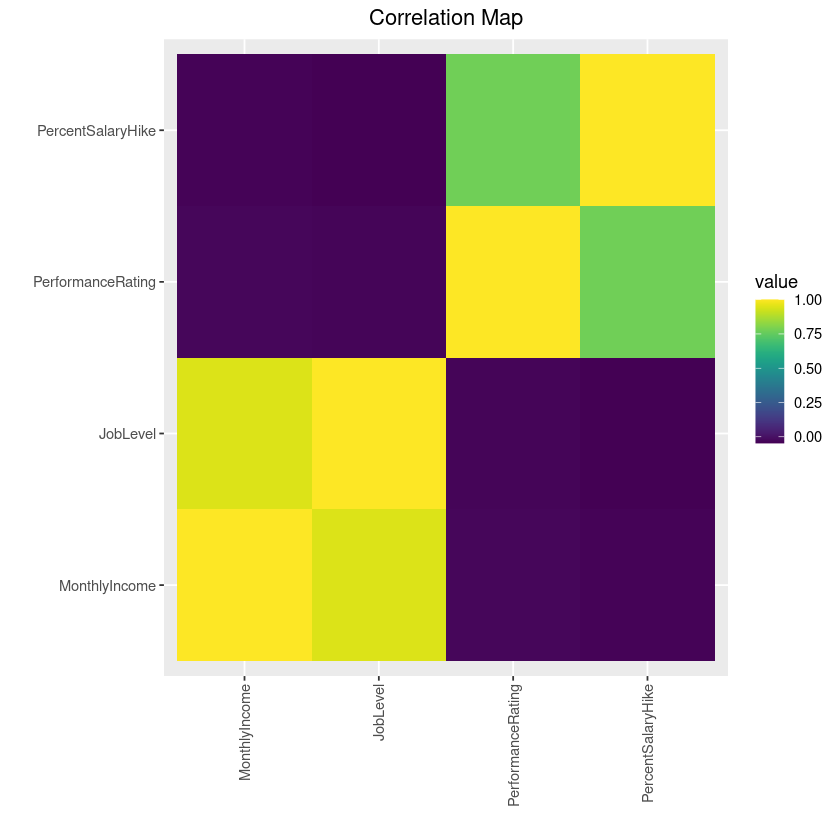

In [7]:
# Correlation
hr1 <- hr[cols]
plot_correlation(hr1, limit = 0.7)

## Feature Selection: CoxPH

There is another assumption of proportional hazard for CoxPH, which can be checked by performing statistical test on Schoenfeld residuals. The error message from `check_proportional_hazard()` suggests that `Department` and `JobRole` should be taken out from the test due to large fitted coefficients, although we will still include in the feature selection.

The result below suggests that `JobLevel`, `MonthlyIncome`, `MonthlyRate`, `NumCompaniesWorked`, `NotWorkingYears` and `TrainingTimesLastYear` violate this assumption ($p < 0.05$). We remove these from our feature when fitting our initial model.

In [8]:
focus_cols <- cols[!(cols %in% c("Department", "JobRole"))]
check_proportional_hazard(coxph_model(hr[focus_cols]))

coxph_cols <- cols[!(cols %in% c("JobLevel", "MonthlyIncome", "NumCompaniesWorked",
                                 "NotWorkingYears", "TrainingTimesLastYear", "MonthlyRate"))]

                            chisq df      p
BusinessTravel           2.92e+00  2 0.2322
DailyRate                8.16e-02  1 0.7752
DistanceFromHome         1.07e+00  1 0.3013
Education                6.77e-02  1 0.7947
EducationField           5.29e+00  5 0.3820
EnvironmentSatisfaction  3.06e-02  1 0.8611
Gender                   5.61e-04  1 0.9811
HourlyRate               1.87e-01  1 0.6651
JobInvolvement           3.69e-02  1 0.8476
JobLevel                 7.67e+00  1 0.0056
JobSatisfaction          9.46e-01  1 0.3306
MaritalStatus            4.22e+00  2 0.1212
MonthlyIncome            1.06e+01  1 0.0012
MonthlyRate              3.99e+00  1 0.0457
NumCompaniesWorked       4.78e+00  1 0.0288
OverTime                 1.90e-01  1 0.6629
PercentSalaryHike        5.65e-01  1 0.4524
PerformanceRating        7.37e-02  1 0.7860
RelationshipSatisfaction 6.22e-02  1 0.8031
StockOptionLevel         2.72e-04  1 0.9868
TrainingTimesLastYear    4.54e+00  1 0.0331
WorkLifeBalance          1.30e+0

Now we try our first iteration below. The concordance index of the initial model with all (feasible) columns selected is around $75\%$, while the PEC graph shows that our model has averagely around $90\%$ accuracy ($10\%$ error) in predicting employee attrition within the span of 10 years.

[1] "Average univariate Cox score:"
                 JobRole         StockOptionLevel            MaritalStatus 
               0.7127730                0.6709757                0.6487915 
                OverTime          JobSatisfaction           BusinessTravel 
               0.6181261                0.6023353                0.5743585 
          JobInvolvement RelationshipSatisfaction  EnvironmentSatisfaction 
               0.5660184                0.5589671                0.5585291 
              Department           EducationField          WorkLifeBalance 
               0.5517142                0.5514034                0.5481524 
        DistanceFromHome                Education    YearsAtOtherCompanies 
               0.5265097                0.5189975                0.5034005 
              HourlyRate                DailyRate                   Gender 
               0.4985805                0.4973095                0.4928019 
       PercentSalaryHike        PerformanceRating 
 

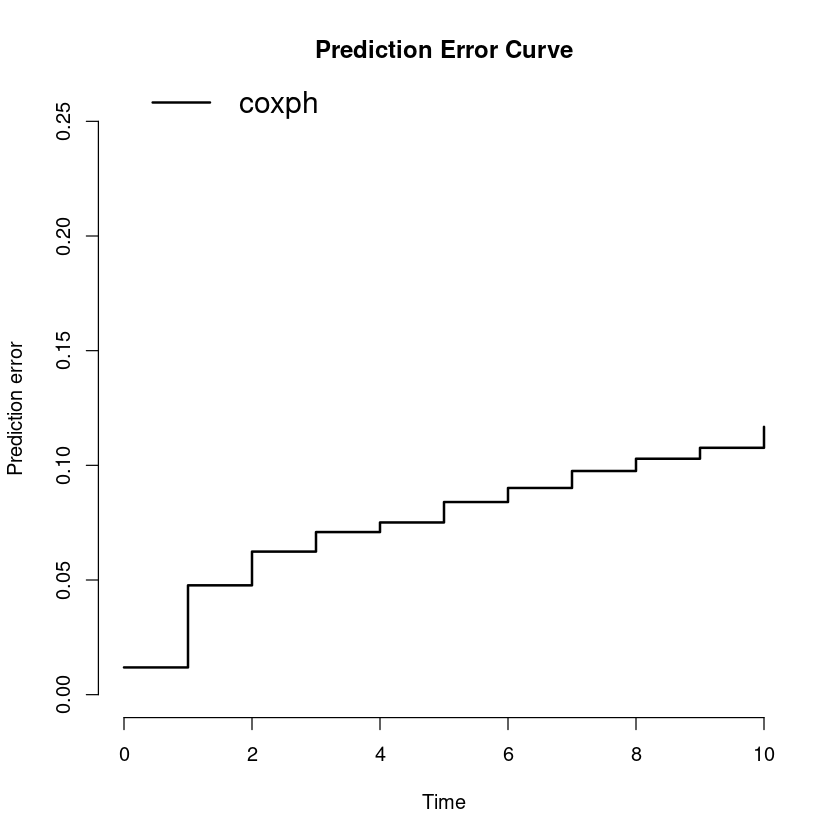

In [9]:
# First iteration
options(warn = -1) # Suppress warnings due to big coxph coefficients

hr1c <- hr[coxph_cols]
print_coxph_var_rank(hr1c)
print_c_index(hr1c, coxph_model)
plot_pec(hr1c, coxph_model)

options(warn = 0) # Reactivate warnings

We can see that (under this particular seed) `JobRole` and `StockOptionLevel` has much higher univariate concordance index compared to others. By taking heuristics that a difference of less than 1% as *not powerful enough*, and considering the benchmark c-index of 0.5 (achieved by a random assigner model), the scores of other covariates seem not prominent enough for feature selection.

When CoxPH is fitted for the top ranked variables, the accuracy metrics did not significantly drop, and they appear statistically significant, at least for some of the categories within a feature.

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  5 ; coefficient may be infinite. ”


[1] "Average univariate Cox score:"
         JobRole StockOptionLevel         OverTime    MaritalStatus 
       0.7102259        0.6618677        0.6411052        0.6343931 
[1] "Average concordance index:"
    coxph 
0.7682939 
[1] "Significance level:"
       JobRoleHuman Resources  JobRoleLaboratory Technician 
                 7.826943e-04                  6.229588e-06 
               JobRoleManager JobRoleManufacturing Director 
                 2.166697e-01                  8.187275e-01 
     JobRoleResearch Director     JobRoleResearch Scientist 
                 7.640576e-02                  1.633781e-03 
       JobRoleSales Executive   JobRoleSales Representative 
                 1.090210e-02                  6.275601e-11 
             StockOptionLevel          MaritalStatusMarried 
                 2.055267e-02                  7.335468e-01 
          MaritalStatusSingle                  OverTimeTRUE 
                 4.663523e-02                  3.795796e-19 


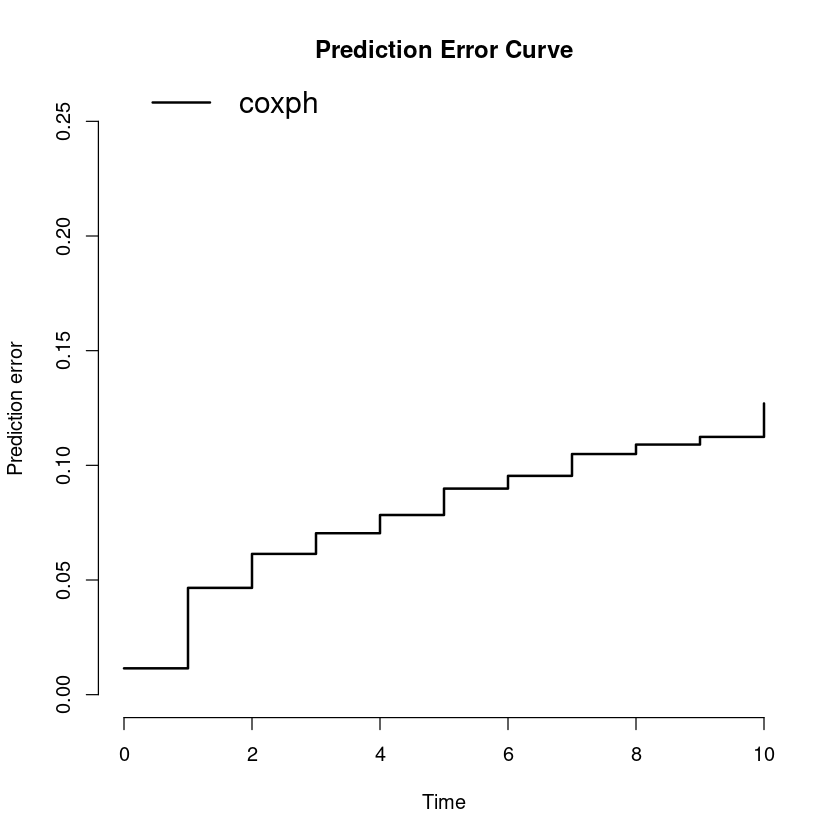

In [10]:
coxph_cols <- c("Attrition", "YearsAtCompany", "JobRole", "StockOptionLevel", "MaritalStatus", "OverTime")
hr1c <- hr[coxph_cols]
print_coxph_var_rank(hr1c)
print_c_index(hr1c, coxph_model)
print("Significance level:")
print(coxph_significance(hr1c, coxph_model(hr1c)))
plot_pec(hr1c, coxph_model)

## Feature Selection: RSF

We develop Random Survival Forest model for our data now. The number of trees used in RSF is on the lower scale (100) for faster process. Note that there is no proportional hazarda assumption here, so the initial feature set can be incorporated here.

The concordance index is better in this case at around $75-80\%$, with PEC error under $7.5\%$ across ten years.

[1] "Average variable importance:"
                JobLevel                 OverTime            MonthlyIncome 
            1.630945e-01             1.317497e-01             7.831372e-02 
        StockOptionLevel       NumCompaniesWorked  EnvironmentSatisfaction 
            3.195891e-02             2.326460e-02             1.773259e-02 
         NotWorkingYears                  JobRole         DistanceFromHome 
            1.749349e-02             1.712400e-02             1.440735e-02 
           MaritalStatus           JobInvolvement    YearsAtOtherCompanies 
            1.313905e-02             8.834599e-03             7.760221e-03 
         JobSatisfaction    TrainingTimesLastYear           BusinessTravel 
            6.608360e-03             6.224397e-03             5.776517e-03 
         WorkLifeBalance                DailyRate        PercentSalaryHike 
            5.404589e-03             5.071455e-03            -4.699152e-03 
RelationshipSatisfaction           EducationField    

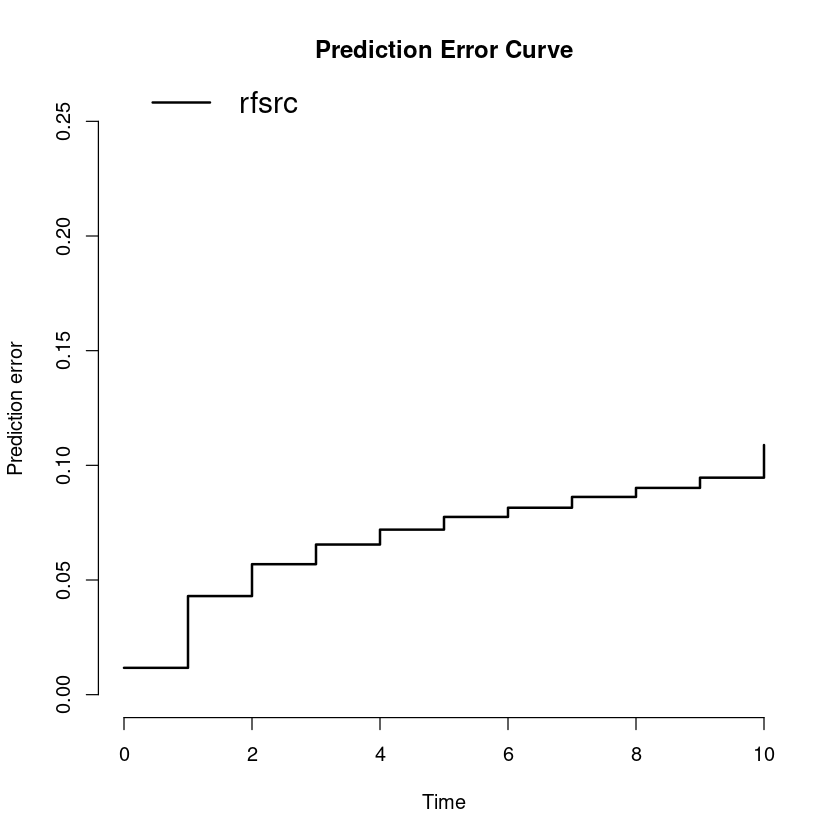

In [11]:
# First iteration
print_rsf_var_rank(hr1)
print_c_index(hr1, rsf_model)
plot_pec(hr1, rsf_model)

The prominent group of importance features considered in RSF are `JobLevel`, `OverTime` and `MonthlyIncome`. We note previoiusly that `JobLevel` and `MonthlyIncome` are highly correlated. We pick `JobLevel` for our consideration, just because it has a higher shown importance level.

Other features such as `StockOptionLevel`, `JobRole`, `EnvironmentSatisfaction` and `NumCompaniesWorked` and `NotWorkingYears`, also appear important. The variable `NumCompaniesWorked` is a categorical data with a lot of levels (i.e. 9), which might bias the RSF algorithm in favor of it.

The feature selection retains the range of concordance index and PEC error curve.

[1] "Average variable importance:"
               JobLevel                OverTime        StockOptionLevel 
             0.27199208              0.15310114              0.09093735 
                JobRole      NumCompaniesWorked         NotWorkingYears 
             0.05805521              0.03540363              0.03173290 
EnvironmentSatisfaction 
             0.02990123 
[1] "Average concordance index:"
    rfsrc 
0.7847811 


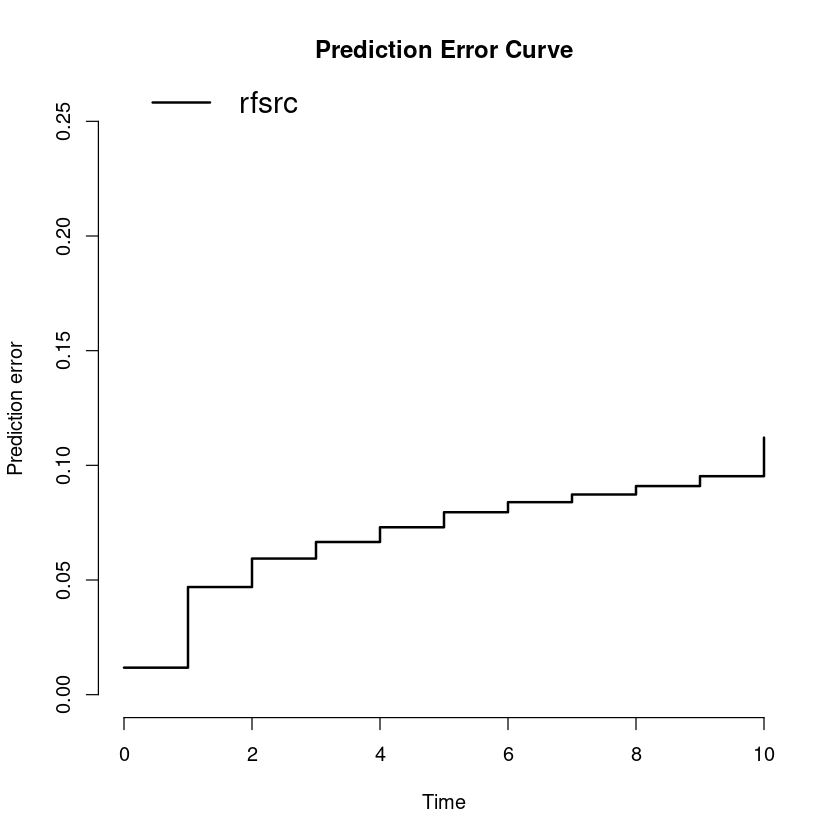

In [12]:
rsf_cols <- c("Attrition", "YearsAtCompany", "JobLevel", "OverTime", "StockOptionLevel", "JobRole",
              "EnvironmentSatisfaction",  "NumCompaniesWorked", "NotWorkingYears")

hr1r <- hr[rsf_cols]
print_rsf_var_rank(hr1r)
print_c_index(hr1r, rsf_model)
plot_pec(hr1r, rsf_model)

### Segmenting Attrition Rate

Since CoxPH and RFS work under different philosophies in prediction, it is reasonable intuition that the common features that are high-ranking will reveal something about employee attrition, such as `JobRole`, `OverTime` and `StockOptionLevel` (in this particular seed).

Now, we examine the attrition pattern rates for these features. If they were continuous variables, this would be in the form of histogram. But since these are categorical, we just classify them:

In [13]:
suppressMessages(library(dplyr))

aggregated_attrition <- function (df, col) {
  options(warn = -1) # Suppress warnings
    
  # Best for categorical (unless numerical int range is small)
  result <- df[, c("Attrition", col)] %>%
  group_by_(col) %>%
  summarize(
    AttritionCount = sum(Attrition),
    TotalEmployees = n(),
    AttritionRate = AttritionCount/TotalEmployees
  )
    
  options(warn = 0) # Reactivate warnings
  return(result)
}

aggregated_attrition(hr, "JobRole")
aggregated_attrition(hr, "OverTime")
aggregated_attrition(hr, "StockOptionLevel")
hr

JobRole,AttritionCount,TotalEmployees,AttritionRate
<fct>,<int>,<int>,<dbl>
Healthcare Representative,7,120,0.05833333
Human Resources,10,48,0.20833333
Laboratory Technician,56,236,0.23728814
Manager,4,78,0.05128205
Manufacturing Director,6,123,0.04878049
Research Director,2,67,0.02985075
Research Scientist,46,269,0.17100372
Sales Executive,50,297,0.16835017
Sales Representative,30,73,0.41095890


OverTime,AttritionCount,TotalEmployees,AttritionRate
<lgl>,<int>,<int>,<dbl>
FALSE,93,939,0.09904153
TRUE,118,372,0.31720430


StockOptionLevel,AttritionCount,TotalEmployees,AttritionRate
<int>,<int>,<int>,<dbl>
0,143,569,0.25131810
1,47,526,0.08935361
2,10,141,0.07092199
3,11,75,0.14666667


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotWorkingYears,YearsAtOtherCompanies
,<int>,<lgl>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,TRUE,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,0,8,0,1,6,4,0,5,33,2
2,49,FALSE,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,1,10,3,3,10,7,1,7,39,0
3,37,TRUE,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,0,7,3,3,0,0,0,0,30,7
4,33,FALSE,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,0,8,3,3,8,7,3,0,25,0
5,27,FALSE,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,1,6,3,3,2,2,2,2,21,4
6,32,FALSE,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,0,8,2,2,7,7,3,6,24,1
7,59,FALSE,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,⋯,3,12,3,2,1,0,0,0,47,11
8,30,FALSE,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,⋯,1,1,2,3,1,0,0,0,29,0
9,38,FALSE,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,⋯,0,10,2,3,9,7,1,8,28,1


Among job positions, managerial positions and Healthcare Representation have around $5\%$ attrition rate, while general positions sit at about $15-25\%$. [A simple online search](https://www.statista.com/statistics/934377/professional-services-worldwide-employee-attrition-by-region/) shows an average of $10-18\%$ global churn rate in 2022, so this company's number is comparatively a pretty high one. Sales reps roles are particularly prone to attrition (a whopping $40\%$) while also having a small number of employees. This is therefore an employee group that we need to focus on for mitigating their leaving.

The result for overtime variable is pretty expected. Meanwhile, no stock options and high stock options seem to have a higher attrition rates. This might mean we need to communicate how stock options work.

## Completing Final Models

Our final model is formed by two methods of CoxPH and RSF, each with their own features.

In [14]:
rsf_final_model <- rsf_model(hr[rsf_cols])
coxph_final_model <- coxph_model(hr[coxph_cols])
rsf_cols
coxph_cols

[1] "Attrition"               "YearsAtCompany"         
[3] "JobLevel"                "OverTime"               
[5] "StockOptionLevel"        "JobRole"                
[7] "EnvironmentSatisfaction" "NumCompaniesWorked"     
[9] "NotWorkingYears"

[1] "Attrition"        "YearsAtCompany"   "JobRole"          "StockOptionLevel"
[5] "MaritalStatus"    "OverTime"

---

## Predicting Employee Attrition Risk

We produce the estimated cumulative hazard function $H(i, t)$ of attrition for each of our employee $i$ for Random Survival Forest model, and hazard ratio relative to the exponent of mean for Cox Proportional Hazard model.

In [15]:
# Appending prediction
hr <- hr_full_row
hr["HazardRatio_CoxPH"] <- predict(coxph_final_model, hr, type = "risk")
# coxph_risk <- exp(predict(coxph_final_model, hr, type = "lp")) %*% t(basehaz(coxph_final_model)["hazard"])

years = 5
rsf_risk <- predict(rsf_final_model, hr)$chf[, 1:(years+1)] # matrix
rsf_survival_probs <- predict(rsf_final_model, hr)$survival[, 1:(years+1)]
hr["Hazard_RSF_Current"] <- rsf_risk[, 1]
hzrsf_cols <- sapply(0:years, function(i) {paste0("Hazard_RSF_", i)})
hr[hzrsf_cols] <- rsf_risk[, 1 + (0:years)]

preview_cols <- c("EmployeeNumber", coxph_cols, rsf_cols, "HazardRatio_CoxPH", hzrsf_cols)

# Table sorted by Cox Hazard Ratio
cutoff = 50
sorted <- function (df, key_col) {
  df <- df[df["Attrition"] == FALSE, ]
  return(row.names(df)[order(df[, key_col], decreasing = TRUE)][1:cutoff])
}
hr_sorted_coxph <- hr[sorted(hr, "HazardRatio_CoxPH"), ]
head(hr_sorted_coxph[, preview_cols])

,EmployeeNumber,Attrition,YearsAtCompany,JobRole,StockOptionLevel,MaritalStatus,OverTime,Attrition.1,YearsAtCompany.1,JobLevel,⋯,EnvironmentSatisfaction,NumCompaniesWorked,NotWorkingYears,HazardRatio_CoxPH,Hazard_RSF_0,Hazard_RSF_1,Hazard_RSF_2,Hazard_RSF_3,Hazard_RSF_4,Hazard_RSF_5
,<int>,<lgl>,<int>,<fct>,<int>,<fct>,<lgl>,<lgl>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1103,1556,FALSE,3,Sales Representative,0,Single,TRUE,FALSE,3,1,⋯,3,3,29,130.26875,0.145940946,0.45205322,0.5840039,0.88707976,1.18442028,1.27372584
1437,2021,FALSE,2,Sales Representative,0,Single,TRUE,FALSE,2,1,⋯,3,1,19,130.26875,0.177137165,0.51491304,0.6534871,0.96844890,1.25433535,1.36506154
764,1055,FALSE,1,Sales Representative,1,Married,TRUE,FALSE,1,1,⋯,3,1,33,57.75212,0.040753300,0.19005208,0.2369264,0.43265652,0.49326763,0.57237734
12,15,FALSE,9,Laboratory Technician,0,Single,TRUE,FALSE,9,2,⋯,4,0,19,49.18252,0.008416063,0.03767387,0.0502452,0.06228164,0.07932529,0.09843352
687,957,FALSE,18,Laboratory Technician,0,Single,TRUE,FALSE,18,1,⋯,4,2,21,49.18252,0.113575694,0.41402236,0.5368366,0.71941106,0.94734539,1.07555715
922,1286,FALSE,4,Laboratory Technician,0,Single,TRUE,FALSE,4,1,⋯,4,0,23,49.18252,0.084634201,0.33853104,0.4330123,0.61465932,0.78566991,0.89533802


### Visualisation with `plotly`

We also use `plotly` to draw an interactive visualisation of  top $50$ employee rank list, where user can explore trends of attrition risks based on various factors. **Unfortunately, it did not render on `nbviewer` but users can download the notebook or R-scropt. A static `.png` preview image is also provided.**

By examining the overlapping of top $50$ employees based on RSF and CoxPH, it seems that employee number $2021$, $1586$, $875$, $957$, $1980$, $120$, $1286$, $1961$ are particularly prone to quitting.

In [16]:
# Plotly implementation
suppressMessages(library(plotly))

group <- "EmployeeNumber"
hr_sorted_rsf <- hr[sorted(hr, "Hazard_RSF_Current"), ]

# Adding RSH trajectory risks
fig <- plot_ly()
for (rank in 1:cutoff) {
  employee_row_num <- as.numeric(rownames(hr_sorted_rsf)[rank])
  employee_row <- hr_sorted_rsf[rank, ]
  x <- 0:(ncol(rsf_risk)-1)
  y <- rsf_risk[employee_row_num, ] #soon
  fig <- fig %>% add_trace(x = x,
                           y = y,
                           name = employee_row["EmployeeNumber"],
                           type = "scatter", mode = "lines+markers", # every time you put type, it assign DOMNum = 0
                           marker = list(size = 4),
                           line = list(shape = "spline", width = 1),
                           hovertemplate = paste0("<i>#", rank, ": Employee ", employee_row["EmployeeNumber"], "</i>",
                                         "\nYear: ", x,
                                         "\nRisk score: ", y),
                           legendgroup = employee_row["EmployeeNumber"],
                           showlegend = TRUE
  )
}

# CoxPH
fig <- fig %>% add_trace(data = hr_sorted_coxph,
                         y = ~HazardRatio_CoxPH,
                         type = "bar",
                         marker = list(color = ~YearsAtCompany),
                         hovertemplate = paste0("Employee ", hr_sorted_coxph$EmployeeNumber,
                                         "\nHazard ratio: ", hr_sorted_coxph$HazardRatio_CoxPH),
                         visible = FALSE, showlegend = FALSE)


# --- Decorators
# Including the baseline
avg_cum_hazard <- -log(1-mean(hr[, "Attrition"]))
baseline <- list(
  type = "line", x0 = 0, x1 = 5, y0 = avg_cum_hazard, y1 = avg_cum_hazard,
  line = list(dash = "dash", width = 4, color = "#82A0D8")
)
fig <- fig %>% layout(
  shapes = list(baseline)
) %>% add_text(
  showlegend = FALSE, x = 0.3, y = 0.22, text = "Average hazard",
  textfont = list(family = "sans serif", size = 10) 
)

# Helper function to group RSF metrics based on variables
library(RColorBrewer)
unique_index <- function(x) {
  unique_vals <- unique(x)
  first_occur <- integer(length(unique_vals))
  for (i in 1:length(unique_vals)) {
    first_occur[i] <- which(x == unique_vals[i])[1]
  }
  return(first_occur)
}
create_buttons <- function(vars) {
  lapply(vars, function(var) {
    color_palletes <- brewer.pal(12, "Set3")
    var_factors <- as.numeric(factor(hr_sorted_rsf[[var]]))
    button <- list(
      method = "restyle",
      label = var,
      args = list(list( # Some elements are just "double-list". This changes style to every DOM elements
        line.color = color_palletes[var_factors],
        marker.color = color_palletes[var_factors],
        legendgroup = hr_sorted_rsf[[var]],
        showlegend = 1:cutoff %in% unique_index(var_factors),
        name = as.character(hr_sorted_rsf[[var]])
      ), 1:cutoff - 1) # The DOMNum it applies to
    )
    return(button)
  })
}


# --- Setting layout
coxph_layout = list(
    title = "High-Risk Employees, according to Hazard Ratio",
    shapes = list(),
    xaxis = list(title = "Rank"),
    yaxis = list(title = "Hazard Ratio")
)
rsf_layout = list( 
    title = "High-Risk Employees: RSF's Accumulated Risk Trajectory",
    shapes = list(baseline),
    xaxis = list(title = "Year", range = c(0, 5), zerolinecolor = '#ffff'),
    yaxis = list(title = "Accummulated Risk until Year _", range = c(0, 1.5), zerolinecolor = '#ffff')
)
fig <- fig %>% layout(unlist(rsf_layout)) %>% layout(
  title = "High-Risk Employees: RSF's Accumulated Risk Trajectory",
  shapes = list(baseline),
  xaxis = list(title = "Year", range = c(0, 5), zerolinecolor = '#ffff'),
  yaxis = list(title = "Accummulated Risk until Year _", range = c(0, 1.5), zerolinecolor = '#ffff'),
  plot_bgcolor = '#e5ecf6',
  updatemenus = list(
    list(
      x = -0.1, y = 0.9, yref = "paper",
      showactive = TRUE,
      buttons = list(
        list(
          label = "Random Survival Forest",
          method = "update",
          args = list(list(visible = c(rep(TRUE, cutoff), FALSE, TRUE)), rsf_layout, 1:(cutoff+2) - 1)
        ),
        list(
          label = "Cox Proportional",
          method = "update",
          args = list(list(visible = c(rep(FALSE, cutoff), TRUE, FALSE)), coxph_layout, 1:(cutoff+2) - 1)
        )
      )
    ), list(
      x = -0.1, y = 0.6, yref = "paper",
      showactive = TRUE,
      buttons = create_buttons(c("EmployeeNumber", "EnvironmentSatisfaction", "JobLevel", "JobRole", "MaritalStatus",
                                 "NotWorkingYears", "NumCompaniesWorked", "OverTime", "StockOptionLevel"))
    )
  ), annotations = list(
    list(
      x = -0.35, y = 1, xref = "paper", yref = "paper", 
      text = "Method", align = "left", showarrow = FALSE
    ), list(
      x = -0.35, y = 0.7, xref = "paper", yref = "paper", 
      text = "Based on", align = "left", showarrow = FALSE, visible = TRUE
    )
  )
)

fig

ERROR: Error in rsf_risk[employee_row_num, ]: subscript out of bounds


---

## Recommended Strategies

### Overtime Management

Excessive overtime can lead to burnout among employees. Implement strategies to manage and reduce overtime, such as workload distribution, hiring additional staff, or arranging flexible work arrangements.

### Targetted Retention Programs

 Develop specific retention programs focused on high-risk job roles, such as Sales Representatives, to address their unique needs and challenges. Provide additional support, training, and incentives to enhance job satisfaction and reduce attrition rates among employees in these roles.

### Financial Compensation & Benefits

Ensure that compensation and benefits packages are competitive and aligned with industry standards. Consider revising the stock option plans or other incentives to increase employee motivation and loyalty.

###  Work-Life Balance Support

Recognize that single employees might have different work-life balance considerations compared to those with family responsibilities. Offer flexible work arrangements, such as remote work options or flexible scheduling, to accommodate their personal needs and preferences. 